 import pandas as pd
 data = pd.read_csv('/DataFilePath/DataFileName.csv')
  data.head()

In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
#Load your dataset: we are using Impact of Mobile Phone on Students Performance dataset
import pandas as pd
#load the dataset
clasification_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CW/Coursework clasification Dataset.csv')
#take a look at the data
clasification_data.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Mortality_Status
0,68,0,0,0,0,1,3,1,4,1,1,24,1,0
1,50,0,1,1,2,2,2,1,35,1,1,14,5,0
2,58,0,2,2,4,2,2,1,63,1,1,14,7,0
3,58,0,0,0,0,1,3,1,18,1,1,2,1,0
4,47,0,1,0,1,1,3,1,41,1,1,3,1,0


In [185]:
#Display the basic stats
clasification_data.astype('object').describe().transpose()

,count,unique,top,freq
Age,4018,40,46,162
Sex,4018,2,0,3999
T_Stage,4018,4,1,1783
N_Stage,4018,3,0,2730
6th_Stage,4018,5,0,1304
Differentiated,4018,4,2,2347
Grade,4018,4,2,2347
A_Stage,4018,2,1,3927
Tumor_Size,4018,110,15,271
Estrogen_Status,4018,2,1,3749


 feature_cols = ['input_feature1_name', 'input_feature2_name', 'input_feature3_name', 'input_feature4_name', ...]

X = data[feature_cols] # Features
y = data['target_feature_name']
 from sklearn.model_selection import train_test_split

  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=value, random_state=value, stratify=y)

In [186]:
#Split the data into inputs and targets
x = clasification_data[['Age',	'Sex',	'T_Stage',	'N_Stage',	'6th_Stage',	'Differentiated',	'Grade',	'A_Stage',	'Tumor_Size',	'Estrogen_Status',	'Progesterone_Status',	'Regional_Node_Examined',	'Regional_Node_Positive']]
y = clasification_data['Mortality_Status']

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)


Classification report for NB
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1021
           1       0.29      0.44      0.35       185

    accuracy                           0.75      1206
   macro avg       0.59      0.62      0.60      1206
weighted avg       0.80      0.75      0.77      1206

confusion_matrix for NB


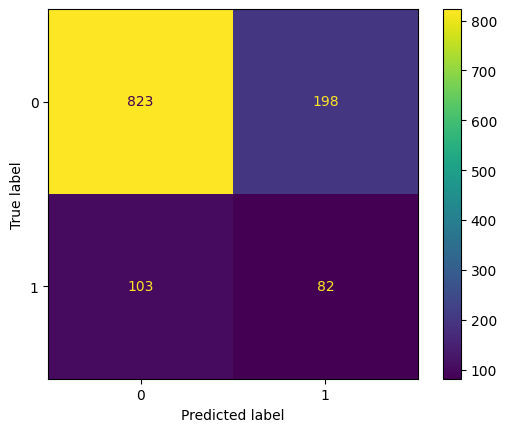

In [187]:
# import the NB algorithm, build the NB model then test it by predicting on the test data
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb=nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)

# Evaluate your NB model byt generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for NB")
print(classification_report(y_test,y_pred_nb))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for NB")
nb_cm=confusion_matrix(y_test,y_pred_nb)
disp=ConfusionMatrixDisplay(confusion_matrix=nb_cm,display_labels=nb.classes_)
disp.plot()


Classification report for LR
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1021
           1       0.68      0.14      0.23       185

    accuracy                           0.86      1206
   macro avg       0.77      0.56      0.58      1206
weighted avg       0.84      0.86      0.82      1206

confusion_matrix for lr


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


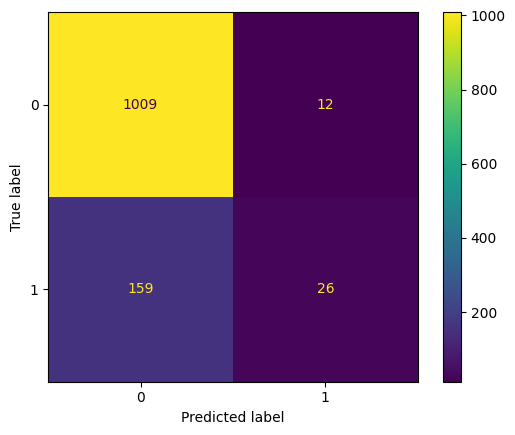

In [188]:
# import the LR algorithm, build the LR model then test it by predicting on the test data
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

# Evaluate your LR model byt generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for LR")
print(classification_report(y_test,y_pred_lr))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for lr")
lr_cm=confusion_matrix(y_test,y_pred_lr)
disp=ConfusionMatrixDisplay(confusion_matrix=lr_cm,display_labels=lr.classes_)
disp.plot()


from sklearn.ensemble import VotingClassifier

base_learners=[('Algorithm1', Algorithm1), ('Algorithm2', Algorithm2)]

ensemble_learner = VotingClassifier(base_learners, voting='soft')

In [189]:
#initiate a new ensemble model
from sklearn.ensemble import VotingClassifier

#create a dictionary of our base learner models
base_learners=[('NB', nb), ('LR', lr)]

#create our voting classifier, inputting our models
ensemble_learner = VotingClassifier(base_learners, voting='hard')

ensemble_learner.fit(X_train, y_train)

y_pred_ensemble_learner = ensemble_learner.predict(X_test)

from sklearn.metrics import accuracy_score



ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)



print ("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)

 from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay



ensemble_learner_cm_test = confusion_matrix(y_test, y_pred_ensemble_learner, labels=ensemble_learner.classes_)



ensemble_learner_disp = ConfusionMatrixDisplay(ensemble_learner_cm_test,display_labels=ensemble_learner.classes_)



ensemble_learner_disp.plot()



ensemble_learner_disp.ax_.set_title("Ensemble Learner Confusion Matrix")

Classification report for Ensmebler
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1021
           1       0.68      0.14      0.23       185

    accuracy                           0.86      1206
   macro avg       0.77      0.56      0.57      1206
weighted avg       0.83      0.86      0.81      1206

confusion_matrix for ensember learner


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


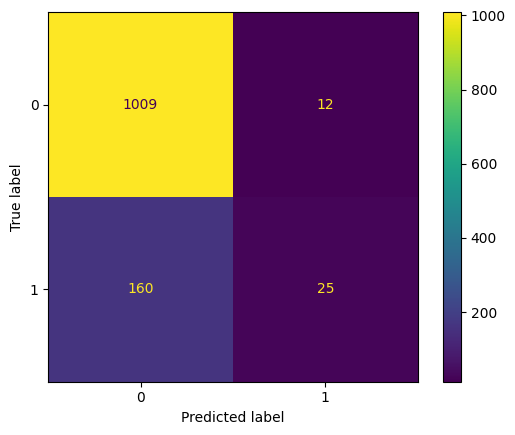

In [190]:
#fit model to training data
ensemble_learner = ensemble_learner.fit(X_train, y_train)
y_pred_ensembler = ensemble_learner.predict(X_test)

# Evaluate your ensemble model by generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for Ensmebler")
print(classification_report(y_test,y_pred_ensembler))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for ensember learner")
ensemble_learner_cm=confusion_matrix(y_test,y_pred_ensembler)
disp=ConfusionMatrixDisplay(confusion_matrix=ensemble_learner_cm,display_labels = ensemble_learner.classes_)
disp.plot()

import pandas as pd
 from sklearn.tree import DecisionTreeRegressor

In [191]:
# To construct and plot decision trees
from sklearn import tree
from matplotlib import pyplot as plt

# Import Decision Tree Classifier to predict loan approval status
from sklearn.tree import DecisionTreeClassifier

# Import Decision Tree Regressor to predict maximum loan amount
from sklearn.tree import DecisionTreeRegressor



In [192]:

#To optimise the Decision Tree model's hyperparameters
from sklearn.model_selection import GridSearchCV

#Import scikit-learn metrics module for classification and regression performance metrics
from sklearn import metrics

# To create and plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# To produce the classification metrics report
from sklearn.metrics import classification_report

# To create, calculate and plot the RoC curve
from sklearn.metrics import RocCurveDisplay


dataset = pd.read_csv('/DataFilePath/DataFileName.csv')

In [193]:
regression_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CW/Coursework regression_data Dataset.csv')

In [194]:
regression_data.shape

(4000, 14)

 dataset.info()

In [195]:
list(regression_data.columns)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months']

In [196]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4000 non-null   int64
 1   Sex                     4000 non-null   int64
 2   T_Stage                 4000 non-null   int64
 3   N_Stage                 4000 non-null   int64
 4   6th_Stage               4000 non-null   int64
 5   Differentiated          4000 non-null   int64
 6   Grade                   4000 non-null   int64
 7   A_Stage                 4000 non-null   int64
 8   Tumor_Size              4000 non-null   int64
 9   Estrogen_Status         4000 non-null   int64
 10  Progesterone_Status     4000 non-null   int64
 11  Regional_Node_Examined  4000 non-null   int64
 12  Reginol_Node_Positive   4000 non-null   int64
 13  Survival_Months         4000 non-null   int64
dtypes: int64(14)
memory usage: 437.6 KB


In [197]:
regression_data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4000.0,53.97275,8.952712,30.0,47.0,54.0,61.0,69.0
Sex,4000.0,0.00475,0.068765,0.0,0.0,0.0,0.0,1.0
T_Stage,4000.0,0.78450,0.766294,0.0,0.0,1.0,1.0,3.0
N_Stage,4000.0,0.43575,0.692092,0.0,0.0,0.0,1.0,2.0
6th_Stage,4000.0,1.31800,1.264822,0.0,0.0,1.0,2.0,4.0
Differentiated,4000.0,1.84875,0.639121,0.0,1.0,2.0,2.0,3.0
Grade,4000.0,2.15125,0.639121,1.0,2.0,2.0,3.0,4.0
A_Stage,4000.0,0.97725,0.149124,0.0,1.0,1.0,1.0,1.0
Tumor_Size,4000.0,30.45475,21.119291,1.0,16.0,25.0,38.0,140.0
Estrogen_Status,4000.0,0.93275,0.250486,0.0,1.0,1.0,1.0,1.0


X = dataset.drop('Target Variable', axis=1)

y = dataset['Target Variable']


In [198]:
# Access the column names of your DataFrame to verify their presence
print("regression_data columns:", regression_data.columns)

# Adjust the column names in your selection accordingly
# Ensure these column names exactly match the names in your DataFrame
# The error was caused by trying to access a column named 'Regional_Node_Positive'
# which likely has a different name in the dataframe.
# Replace 'Regional_Node_Positive' with the correct column name.
# Based on the provided CSV file, it could be 'Regional Node Positive'
x = regression_data[['Age',	'Sex',	'T_Stage',	'N_Stage',	'6th_Stage',	'Differentiated',	'Grade',	'A_Stage',	'Tumor_Size',	'Estrogen_Status',	'Progesterone_Status',	'Regional_Node_Examined',	'Reginol_Node_Positive']]
y = regression_data['Survival_Months']

# If any of the columns are not found, you'll need to correct their names
# based on the output of `print(regression_data.columns)`

regression_data columns: Index(['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months'],
      dtype='object')


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=value, random_state=value)

In [199]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)


In [200]:
# To train the algorithm use fit method
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# To make predictions on the test set, ues the predict method:
y_pred = regressor.predict(X_test)

# Display the full tree depth
print("The full Regression Decision Tree Levels: ", regressor.tree_.max_depth)


The full Regression Decision Tree Levels:  27


DT_regressor = DecisionTreeRegressor()

DT_regressor.fit(X_train, y_train)

y_pred = DT_regressor.predict(X_test)

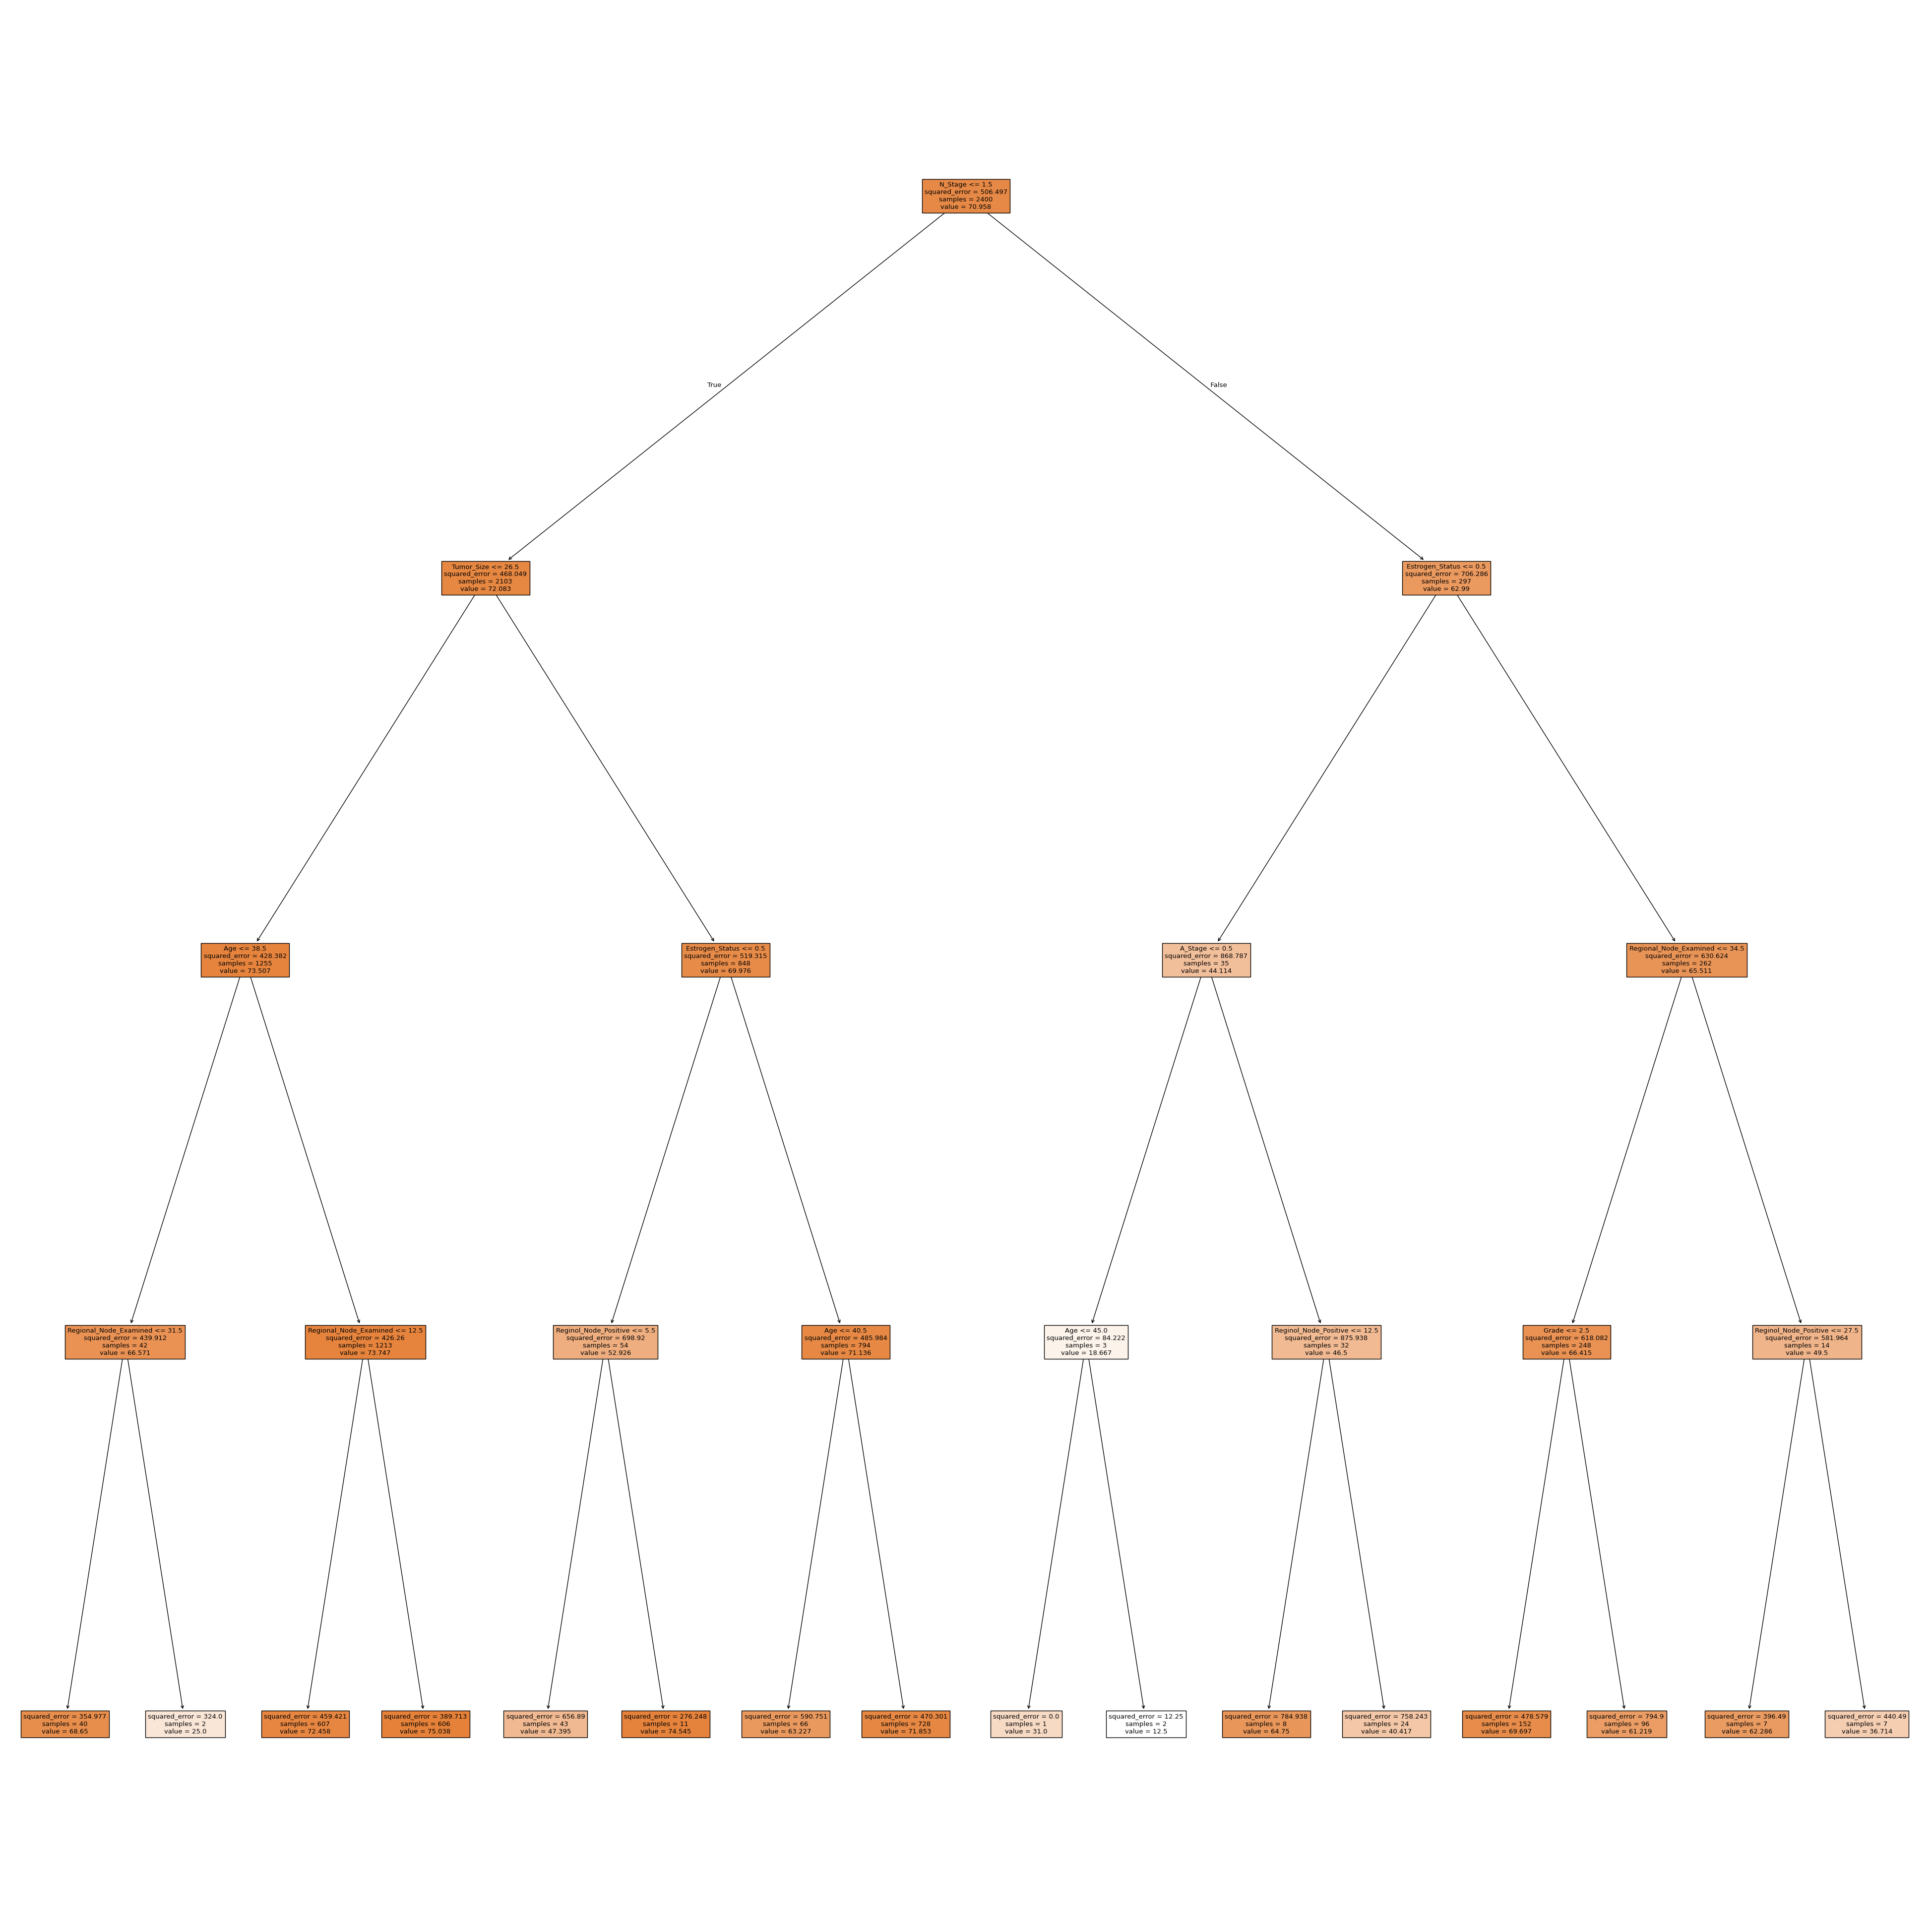

In [201]:
# Limit the tree growth to 4 levels
pruned_regressor = DecisionTreeRegressor(max_depth=4)
pruned_regressor.fit(X_train, y_train)

# To make predictions on the test set, ues the predict method:
y_pred_pruned = pruned_regressor.predict(X_test)

# Plot the regression DT
pruned_Tree_model = plt.figure(figsize=(50,50))
pruned_Tree_model_Graph = tree.plot_tree(pruned_regressor, feature_names=list(X_train.columns), filled=True)

#To save the DT graph as a png image
pruned_Tree_model.savefig("pruned_reg_decision_tree.png")


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

print('R2:', metrics.r2_score(y_test, y_pred))

In [202]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 25.516875
MSE: 1032.486875
R2: -1.0309949271929737
